In [205]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import ipywidgets as widgets

plt.rcParams["figure.figsize"] = (7,7)

In [206]:
img = cv.imread('C:/Users/Irina/ImageProcessing/ImageProcessing/task(7.1-7.3)/(1).jpg') #('planet_destroing.jpg')
# plt.imshow(img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

(-0.5, 224.5, 224.5, -0.5)

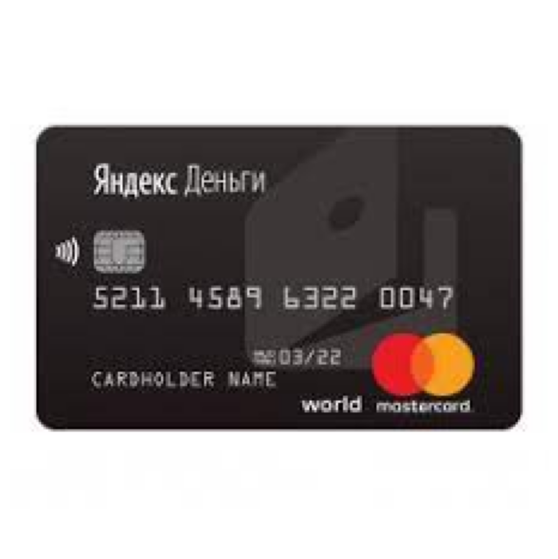

In [207]:
plt.imshow(img)
plt.axis('off')

In [208]:
@widgets.interact(th1 = (0.0, 200.0), th2 = (0.0, 200.0))
def CannyEdges(th1=100.0, th2=100.0):
    edges = cv.Canny(img, th1, th2)
    fg, (ax1, ax2) = plt.subplots(1, 2)

    plt.rcParams["figure.figsize"] = (10,10)

    ax1.set_title("Orig")
    ax1.imshow(img)
    ax1.axis('off')

    ax2.set_title("Edges")
    ax2.imshow(edges, cmap='gray')
    ax2.axis('off')

    plt.show()

interactive(children=(FloatSlider(value=100.0, description='th1', max=200.0), FloatSlider(value=100.0, descrip…

In [209]:
def detect(c):
    shape = "unidentified"
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.04 * peri, True)
    if len(approx) == 3:
        shape = "triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv.boundingRect(approx)
        ar = w / float(h)
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
    elif len(approx) >= 5:
        ellipse = cv.fitEllipse(approx)
        ratio = ellipse[1][0] / ellipse[1][1]
        ratio = ratio if ratio < 1 else (1 / ratio)
        shape = "circle" if ratio >= 0.9 else "ellipsis"
    return shape

(-0.5, 224.5, 224.5, -0.5)

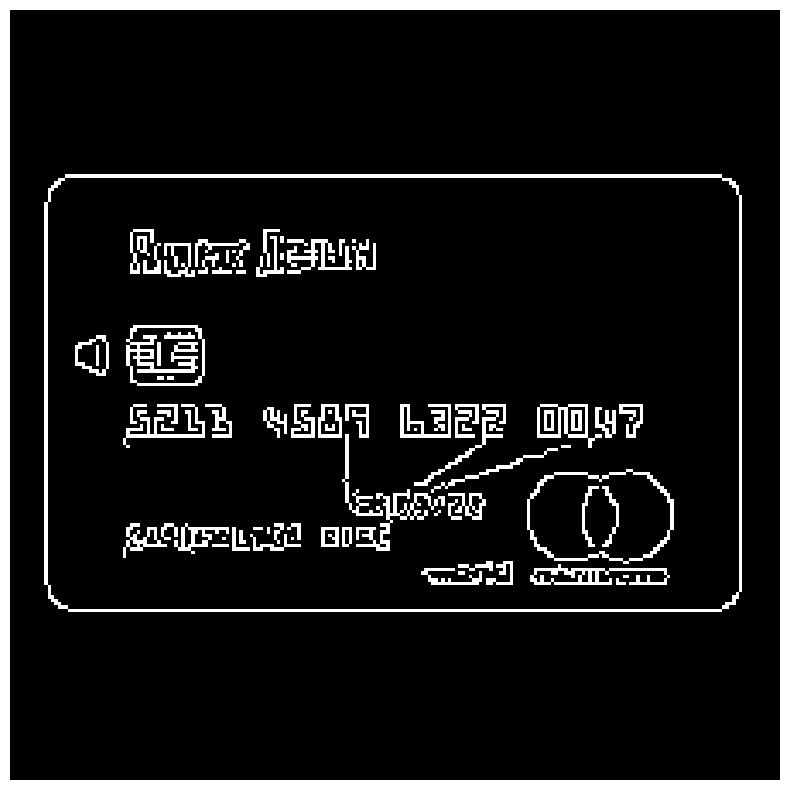

In [210]:
edged = cv.Canny(img, 50, 200)
plt.imshow(edged, cmap='gray')
plt.axis('off')

In [211]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (7, 7))
closed = cv.morphologyEx(edged, cv.MORPH_CLOSE, kernel)
contours = cv.findContours(closed.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

(-0.5, 224.5, 224.5, -0.5)

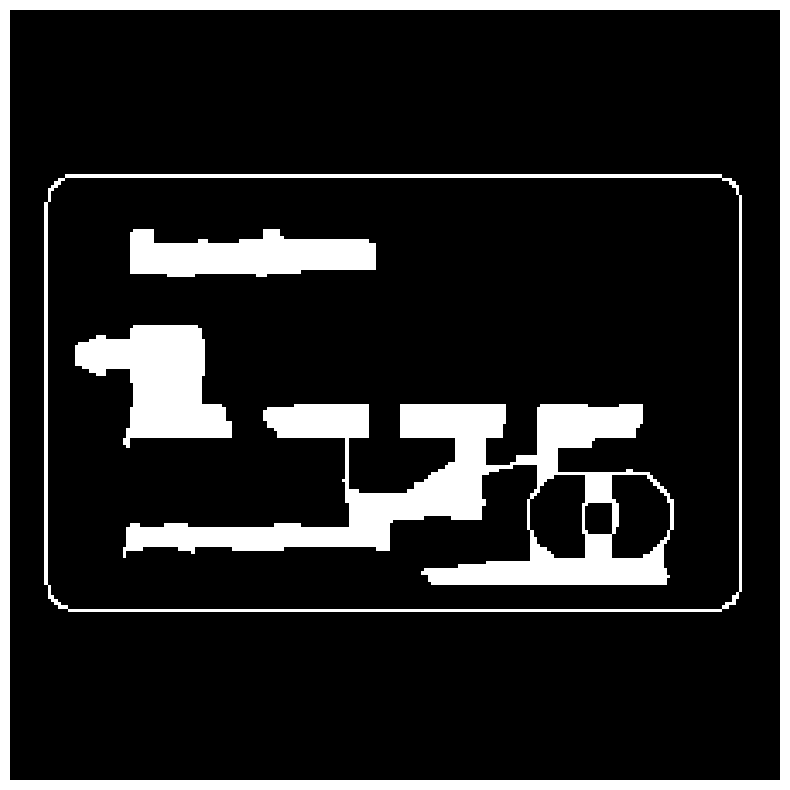

In [212]:
plt.imshow(closed, cmap='gray')
plt.axis('off')

In [213]:
def howBigIsArea(img, contours):
    max_area = -1
    S = img.shape[0] * img.shape[1]
    P = (img.shape[0] + img.shape[1]) * 2
#     cnt = np.array(len(contours))
    for i in range(len(contours)):
        area = cv.contourArea(contours[i])
#         print(0.995 * S, area)
        if max_area < area <= 0.95 * S:
            cnt = contours[i]
#             print(cnt)
            max_area = area
    
    perimeter = cv.arcLength(cnt, True)
    parameter = max(max_area, perimeter)
#     print(parameter, max_area, area)
    parameter = parameter/S
    print(S, parameter)
    if 0 <= parameter <= 0.09:
        return "small"
    elif 0.09 < parameter <= 0.3:
        return "average"
    else:
        return "huge"

In [214]:
from PIL import Image
im = Image.open("item_886.jpg")
(width, height) = im.size
width*height

2890000

In [215]:
# print(contours[0])
print(f'It is a {howBigIsArea(img, contours)} {detect(contours[-1])}')

50625 0.5080691358024692
It is a huge rectangle


(-0.5, 224.5, 224.5, -0.5)

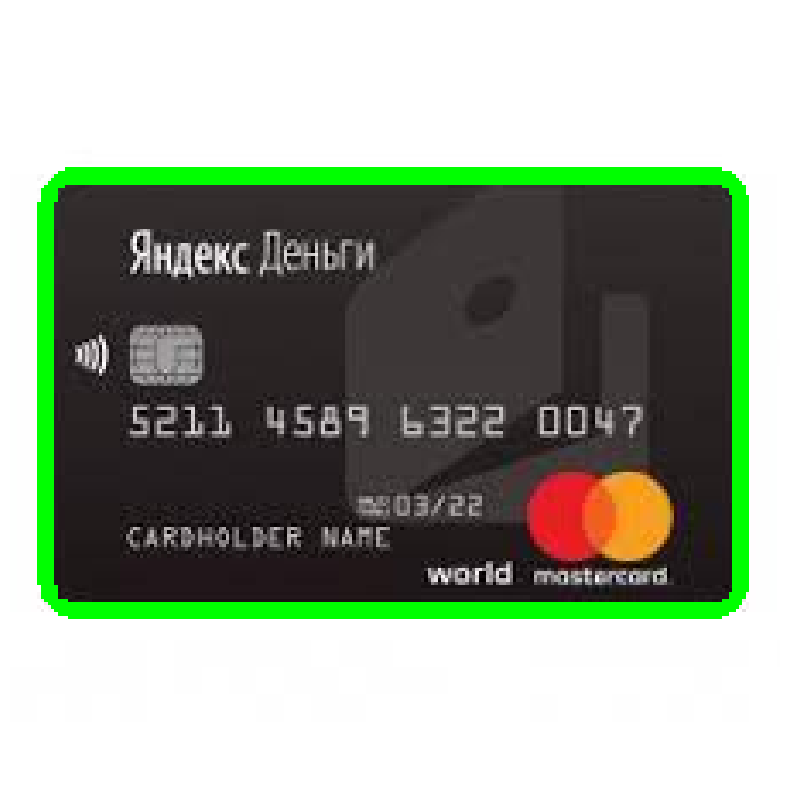

In [216]:
cv.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.imshow(img, cmap='gray')
plt.axis('off')